In [2]:
import numpy as np
from matplotlib import pyplot as plt
import sys, os
plt.style.use('/projects/DEIKE/jiarongw/jiarongw-postprocessing/media/matplotlib/stylelib/jfm.mplstyle')
from tqdm import tqdm
# import matplotlib as mpl
sys.path.append('/projects/DEIKE/jiarongw/jiarongw-postprocessing/jupyter_notebook/project_specific/windwave/')
from helper import RealWave
from prepare import load_object, save_object
from defs import Case, Interface2D

In [3]:
""" Already knowing the phase at each time, align them
    Read in other fields.
    This is different from the read_fields in prepare.py because we need the 3D field, not its 2D average """

def read_fields (case, field_t=None):
    ux_3D_ensem = []
    uy_3D_ensem = []
    f_3D_ensem = []
    eta_ensem = []
    if (field_t.all == None):
        field_t = case.field_t       
        
    for i,t in tqdm(enumerate(field_t-case.tstart)):

        NSLICE = 256    
        NGRID = 512
        ux_3D = {'name':'ux', 'value':[]} # axis0 in z, axis1 in x, axis2 in y  (in the code)
        uy_3D = {'name':'uy', 'value':[]}
        f_3D = {'name':'f', 'value':[]}
        tsimu = t + case.tstart
        print(tsimu)
        phasei = np.where(np.isclose(np.array(case.phase['t']), t))[0][0]
        idx = case.phase['idx'][phasei]
        eta = np.roll(case.phase['eta'][phasei], -idx, axis=1) 
        eta_ensem.append(eta)

        # Read in the fields either from pickle or from slice data
        for field in (ux_3D,uy_3D,f_3D):         
            """NOTICE: to accomodate different pickle versions"""
            picklename = case.path + 'field/' + 'pickle_tiger/' + field['name']+'_t%g' % tsimu +'.pkl'
    #             picklename = working_dir + 'field/' + 'pickle_desktop/' + field['name']+'_t%g' % t +'.pkl'
            exists = os.path.exists(picklename)
            # If the pickle is there read in the pickles
            if exists:
                field['value'] = load_object(picklename)
                print('pickle restored!')
            # If no pickle read in from the slice files and pickle dump
            if not exists:
                for sn in range (0, NSLICE-1):
                    filename = case.path + 'field/'+field['name']+'_t%g_slice%g' % (tsimu,sn)
                    snapshot = np.loadtxt(filename, dtype = np.str, delimiter='\t')
                    snapshot.reshape([NGRID,NGRID+1])
                    field['value'].append(snapshot[:,0:NGRID].astype(np.float))
                field['value'] = np.array(field['value'])
                save_object(field['value'], picklename)

            # Shift the values along x axis
            field['value'] = np.roll(field['value'], -idx, axis=1)

#         case.ux_2D.append(np.average(ux_3D['value'], axis=0))
#         case.uy_2D.append(np.average(uy_3D['value'], axis=0))
#         case.f_2D.append(np.average(f_3D['value'], axis=0))

        ux_3D_ensem.append(ux_3D['value'])
        uy_3D_ensem.append(uy_3D['value'])
        f_3D_ensem.append(f_3D['value'])
        
    return (eta_ensem, ux_3D_ensem, uy_3D_ensem, f_3D_ensem)



In [4]:
''' Pick a case, and time range '''
from phase import extract_phase

""" CU = 2 """
case1 = Case(ustar=0.25, Retau=720, Bo=200, g=1, ak=0.2, LEVEL=10, emax=0.3, alterMU=16, NOMATCH=True, 
             PRINTWAVE=True, OUTLEVEL=9, prefix='curved_fixREtau_boundary_', working_dir='/projects/DEIKE/jiarongw/turbulence/')
case = case1
case.tstart = 57
case.tsimu = np.arange(58,113,1)
extract_phase(case, case.tsimu)
case.field_t_select = np.array([60, 70, 90, 100])
case.eta_ensem, case.ux_3D_ensem, case.uy_3D_ensem, case.f_3D_ensem = read_fields(case, case.field_t_select)
case.eta_1D_select = [np.average(eta, axis=0) for eta in case.eta_ensem] # eta is already aligned
case.ux_2D_select = [np.average(ux_3D, axis=0) for ux_3D in case.ux_3D_ensem]
case.uy_2D_select = [np.average(uy_3D, axis=0) for uy_3D in case.uy_3D_ensem]
case.f_2D_select = [np.average(f_3D, axis=0) for f_3D in case.f_3D_ensem]

""" CU = 4 """
case2 = Case(ustar=0.25, Retau=720, Bo=200, g=4, ak=0.2, LEVEL=10, emax=0.3, alterMU=8, NOMATCH=True, 
             PRINTWAVE=True, OUTLEVEL=9, prefix='curved_fixREtau_boundary_', working_dir='/projects/DEIKE/jiarongw/turbulence/')
case = case2
case.tstart = 57
case.tsimu = np.arange(58,101,1)
extract_phase(case, case.tsimu)
case.field_t_select = np.array([60, 70, 80, 90])
case.eta_ensem, case.ux_3D_ensem, case.uy_3D_ensem, case.f_3D_ensem = read_fields(case, case.field_t_select)
case.eta_1D_select = [np.average(eta, axis=0) for eta in case.eta_ensem] # eta is already aligned
case.ux_2D_select = [np.average(ux_3D, axis=0) for ux_3D in case.ux_3D_ensem]
case.uy_2D_select = [np.average(uy_3D, axis=0) for uy_3D in case.uy_3D_ensem]
case.f_2D_select = [np.average(f_3D, axis=0) for f_3D in case.f_3D_ensem]

""" CU = 8 """
case3 = Case(ustar=0.25, Retau=720, Bo=200, g=16, ak=0.2, LEVEL=10, emax=0.3, alterMU=4, NOMATCH=True, 
             PRINTWAVE=True, OUTLEVEL=9, prefix='curved_fixREtau_boundary_', working_dir='/projects/DEIKE/jiarongw/turbulence/')
case = case3
case.tstart = 57
case.tsimu = np.arange(58,73,1)
extract_phase(case, case.tsimu)
case.field_t_select = np.array([60, 64, 68, 72])
case.eta_ensem, case.ux_3D_ensem, case.uy_3D_ensem, case.f_3D_ensem = read_fields(case, case.field_t_select)
case.eta_1D_select = [np.average(eta, axis=0) for eta in case.eta_ensem] # eta is already aligned
case.ux_2D_select = [np.average(ux_3D, axis=0) for ux_3D in case.ux_3D_ensem]
case.uy_2D_select = [np.average(uy_3D, axis=0) for uy_3D in case.uy_3D_ensem]
case.f_2D_select = [np.average(f_3D, axis=0) for f_3D in case.f_3D_ensem]

/projects/DEIKE/jiarongw/turbulence/curved_fixREtau_boundary_REtau720_BO200_g1_ak0.2_MU16_LEVEL10_emax0.3/
mu1 = 7.67063e-06, rho1 = 1, mu2 = 2.24719e-06, rho2 = 0.001225, sigma = 0.0003125
Given k = 4 (1/m), calculated omega = 2.00499 (1/s), period = 3.13377 (s), phase speed c = 0.501248 (m/s), wavelength = 1.5708 (m), Bo = 200
g = 1, c = 0.501248, Ustar = 0.25, MURATIO = 0.01831, mu_w = 7.67063e-06, rho_w = 1, mu_a = 2.24719e-06, rho_a = 0.001225, sigma = 0.0003125, Bo = 200, RE = 102646, Re_tau = 720
RELEASETIME = 57, uemax = 0.075 
tiger-h19c2n6.28240Exhausted 1048576 MQ irecv request descriptors, which usually indicates a user program error or insufficient request descriptors (PSM2_MQ_RECVREQS_MAX=1048576)
srun: Job step aborted: Waiting up to 47 seconds for job step to finish.
slurmstepd: error: *** STEP 7188585.0 ON tiger-h19c2n6 CANCELLED AT 2021-09-21T01:12:00 DUE TO TIME LIMIT ***
[warn] Epoll ADD(4) on fd 42 failed.  Old events were 0; read change was 0 (none); write change 

0it [00:00, ?it/s]

60
pickle restored!
pickle restored!
pickle restored!


1it [00:01,  1.81s/it]

70
pickle restored!
pickle restored!
pickle restored!


2it [00:03,  1.80s/it]

90
pickle restored!
pickle restored!
pickle restored!


3it [00:05,  1.78s/it]

100
pickle restored!
pickle restored!
pickle restored!


4it [00:07,  1.79s/it]


/projects/DEIKE/jiarongw/turbulence/curved_fixREtau_boundary_REtau720_BO200_g4_ak0.2_MU8_LEVEL10_emax0.3/
mu1 = 1.53413e-05, rho1 = 1, mu2 = 2.24719e-06, rho2 = 0.001225, sigma = 0.00125
Given k = 4 (1/m), calculated omega = 4.00999 (1/s), period = 1.56688 (s), phase speed c = 1.0025 (m/s), wavelength = 1.5708 (m), Bo = 200
g = 4, c = 1.0025, Ustar = 0.25, MURATIO = 0.01831, mu_w = 1.53413e-05, rho_w = 1, mu_a = 2.24719e-06, rho_a = 0.001225, sigma = 0.00125, Bo = 200, RE = 102646, Re_tau = 720
RELEASETIME = 57, uemax = 0.075 
srun: Job step aborted: Waiting up to 47 seconds for job step to finish.
slurmstepd: error: *** STEP 6251153.0 ON tiger-h21c2n21 CANCELLED AT 2021-04-19T06:24:06 DUE TO TIME LIMIT ***

pickle restored!


0it [00:00, ?it/s]

60
pickle restored!
pickle restored!
pickle restored!


1it [00:01,  1.87s/it]

70
pickle restored!
pickle restored!
pickle restored!


2it [00:03,  1.85s/it]

80
pickle restored!
pickle restored!
pickle restored!


3it [00:05,  1.86s/it]

90
pickle restored!
pickle restored!
pickle restored!


4it [00:07,  1.85s/it]


/projects/DEIKE/jiarongw/turbulence/curved_fixREtau_boundary_REtau720_BO200_g16_ak0.2_MU4_LEVEL10_emax0.3/
mu1 = 3.06825e-05, rho1 = 1, mu2 = 2.24719e-06, rho2 = 0.001225, sigma = 0.005
Given k = 4 (1/m), calculated omega = 8.01998 (1/s), period = 0.783442 (s), phase speed c = 2.00499 (m/s), wavelength = 1.5708 (m), Bo = 200
g = 16, c = 2.00499, Ustar = 0.25, MURATIO = 0.01831, mu_w = 3.06825e-05, rho_w = 1, mu_a = 2.24719e-06, rho_a = 0.001225, sigma = 0.005, Bo = 200, RE = 102646, Re_tau = 720
RELEASETIME = 57, uemax = 0.075 
srun: Job step aborted: Waiting up to 47 seconds for job step to finish.
slurmstepd: error: *** STEP 7313935.0 ON tiger-h19c1n14 CANCELLED AT 2021-09-30T13:42:50 DUE TO TIME LIMIT ***

pickle restored!


0it [00:00, ?it/s]

60
pickle restored!
pickle restored!
pickle restored!


1it [00:01,  1.84s/it]

64
pickle restored!
pickle restored!
pickle restored!


2it [00:03,  2.01s/it]

68
pickle restored!
pickle restored!
pickle restored!


3it [00:06,  2.04s/it]

72
pickle restored!
pickle restored!
pickle restored!


4it [00:07,  1.97s/it]


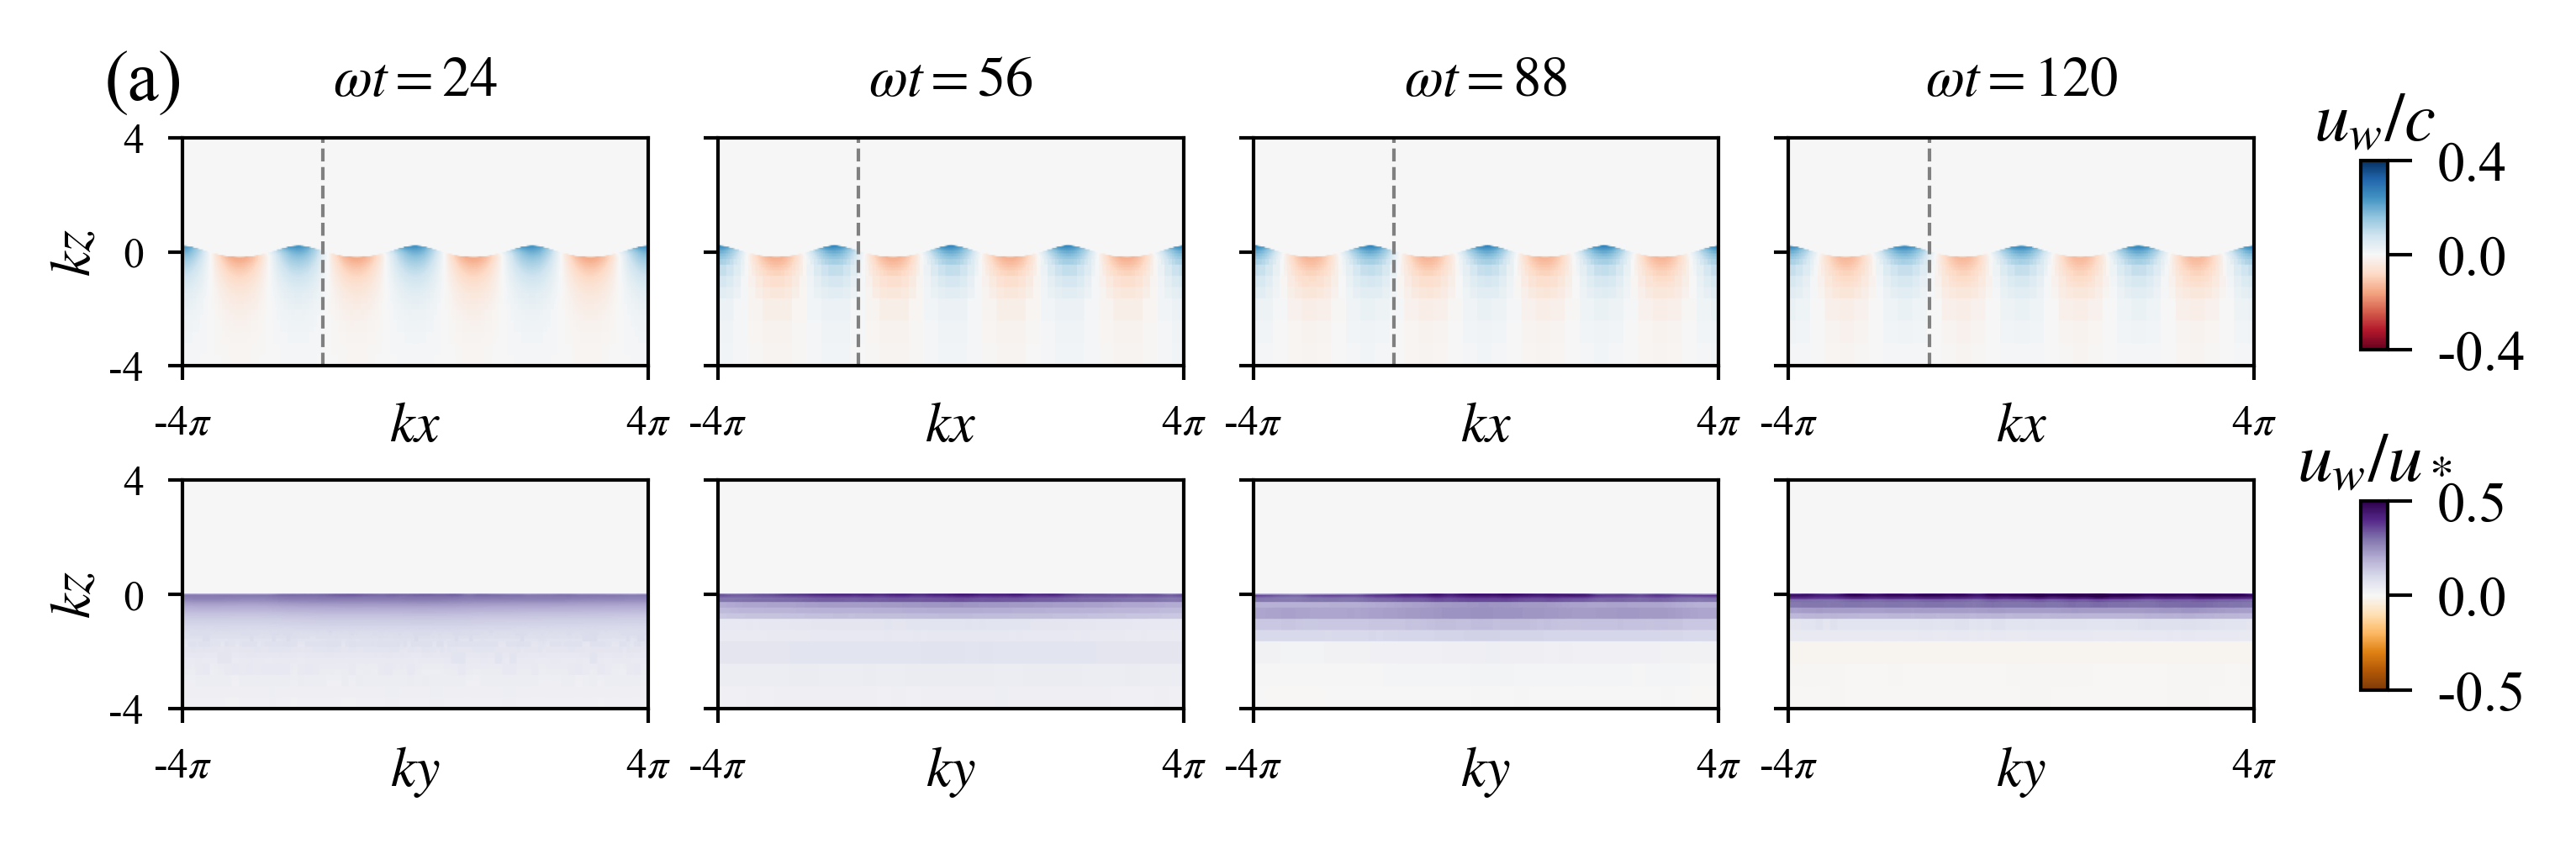

In [49]:
"""Panel of u water"""
from mpl_toolkits.axes_grid1 import ImageGrid
from matplotlib.ticker import FuncFormatter, MultipleLocator
fig, axes = plt.subplots(2,4, sharey='row', figsize=[5.3,1.5], gridspec_kw={'height_ratios':[1,1], "wspace":0.15, "hspace":0.5})

case = case3
field_t = case.field_t_select
""" ux_3D are stacked with z, x, y """
for i in range(0,4):
    part1 = case.ux_3D_ensem[i][128,1:-1]*(case.f_3D_ensem[i][128,1:-1]**1)
    slice2 = 155
    part2 = case.ux_3D_ensem[i][:,slice2]*(case.f_3D_ensem[i][:,slice2]**1)
    pcontour1 = axes[0,i].imshow(np.rot90(part1)/case.wave.c, cmap='RdBu', 
                   vmax = 0.4, vmin = -0.4, extent=[-np.pi,np.pi,-1,2*np.pi-1], aspect='auto')
#     pcontour2 = axes[1,i].imshow(np.rot90(part2)/case.ustar, cmap='PuOr', 
#                    vmax = 0.3, vmin = -0.3, extent=[-np.pi,np.pi,-1,2*np.pi-1], aspect='auto')
    pcontour2 = axes[1,i].imshow(np.rot90(part2)/case.ustar, cmap='PuOr', extent=[-np.pi,np.pi,-1,2*np.pi-1], 
                                 vmax = 0.5, vmin = -0.5, aspect='auto')

    axes[0,i].xaxis.set_major_formatter(FuncFormatter(
       lambda val,pos: '{:.0g}$\pi$'.format(4*val/np.pi) if val !=0 else '0'
    ))
    axes[1,i].xaxis.set_major_formatter(FuncFormatter(
       lambda val,pos: '{:.0g}$\pi$'.format(4*val/np.pi) if val !=0 else '0'
    ))
    axes[0,i].yaxis.set_major_formatter(FuncFormatter(
       lambda val,pos: '{:.0g}'.format(4*val) if val !=0 else '0'
    ))
    axes[1,i].yaxis.set_major_formatter(FuncFormatter(
       lambda val,pos: '{:.0g}'.format(4*val) if val !=0 else '0'
    ))
    axes[0,i].set_xticks([-np.pi,np.pi]); axes[1,i].set_xticks([-np.pi,np.pi])
    axes[0,i].set_ylim([-1,1]); axes[1,i].set_ylim([-1,1])
    axes[0,i].set_yticks([-1,0,1]); axes[1,i].set_yticks([-1,0,1])
    axes[0,i].tick_params(axis='both', which='major', labelsize=6, size=2); axes[1,i].tick_params(axis='both', which='major', labelsize=6, size=2)
    axes[0,i].set_xticks([-np.pi,np.pi]); axes[1,i].set_xticks([-np.pi,np.pi])
    axes[0,i].set_xlabel('$kx$', labelpad=-6, fontsize=8)
    axes[1,i].set_xlabel('$ky$', labelpad=-6, fontsize=8)

    t = (field_t[i] - case.tstart)*(case.g*case.k)**0.5
    axes[0,i].set_title(r'$\omega t = %.0f$' %t, fontsize=8)

x = np.ones(100)*(slice2/512*2*np.pi-np.pi)
y = np.linspace(-1,2*np.pi-1,100)
axes[0,0].plot(x,y, '--', color='gray', lw=0.5)
axes[0,1].plot(x,y, '--', color='gray', lw=0.5)
axes[0,2].plot(x,y, '--', color='gray', lw=0.5)
axes[0,3].plot(x,y, '--', color='gray', lw=0.5)
# axes[0,0].text(-3, 5, '$x-y$', ha='left', va='bottom')
# axes[0,0].text(-3, 3.2, '$x-z$', ha='left', va='bottom')

cb_ax1 = fig.add_axes([0.94, 0.6, 0.01, 0.25])
v1 = np.linspace(-0.4, 0.4, 3, endpoint=True)
cbar1 = fig.colorbar(pcontour1, orientation="vertical", cax=cb_ax1, ticks=v1)
cbar1.ax.tick_params(axis='both', which='major', labelsize=8)
cbar1.ax.text(0.5, 1.2, r'$u_w/c$', ha='center', va='center', transform=cbar1.ax.transAxes, fontsize=10) 

cb_ax2 = fig.add_axes([0.94, 0.15, 0.01, 0.25])
v2 = np.linspace(-0.5, 0.5, 3, endpoint=True)
# v2 = np.linspace(-0.3, 0.3, 3, endpoint=True)
cbar2 = fig.colorbar(pcontour2, orientation="vertical", cax=cb_ax2, ticks=v2)
cbar2.ax.tick_params(axis='both', which='major', labelsize=8)
cbar2.ax.text(0.5, 1.2, r'$u_w/u_*$', ha='center', va='center', transform=cbar2.ax.transAxes, fontsize=10) 

# for ax in axes:
# axes[1,1].set_xlabel('$kx$')
axes[0,0].set_ylabel('$kz$', labelpad=1, fontsize=8)
axes[1,0].set_ylabel('$kz$', labelpad=1, fontsize=8)
axes[0,0].text(0, 1.1, r'(a)', ha='right', va='bottom', transform=axes[0,0].transAxes, fontsize=10) 
# fig.savefig('./review/panel_uwater_CU%.0f.pdf' %(case.wave.c/case.ustar), bbox_inches='tight')
fig.savefig('./review/panel_uwater_CU%.0f_alter.pdf' %(case.wave.c/case.ustar), bbox_inches='tight')
# fig.savefig('./review/panel_uwater_CU%.0f_single.pdf' %(case.wave.c/case.ustar), bbox_inches='tight')

### Water mean profile

In [9]:
""" REWRITTEN water profile interpolation function! """
from scipy.interpolate import interp1d
def water_profile_new(u_water, eta):
    """ uwater: a 2D array of water velocity 
        eta: a 1D array of surface """
    u_water_interp = np.zeros(u_water.shape)
    zplot = np.zeros(u_water.shape) # To show in the original cartesian grid z where the interpolating grid z' is
    for i in range(u_water.shape[0]): # For each x
        z = np.linspace(-1,2*np.pi-1,512,endpoint=False) + 2*np.pi/2/512
        f = interp1d(z, u_water[i,:], kind='quadratic')
        # The ratio to make sure that the cartesian representation of z' falls within the domain
        zeta = np.linspace(-1,2*np.pi-1,512,endpoint=False) + 2*np.pi/2/512
        zgrid = zeta + eta[i]*np.exp(-1*np.abs(zeta))
        zplot[i] = zgrid
        ugrid = f(zgrid[10:-10]) # Don't have to fill it all
        u_water_interp[i,10:-10] = ugrid
    u_water_1D = np.average(u_water_interp[:,:], axis=0)
    return u_water, u_water_interp, u_water_1D, zeta, zplot

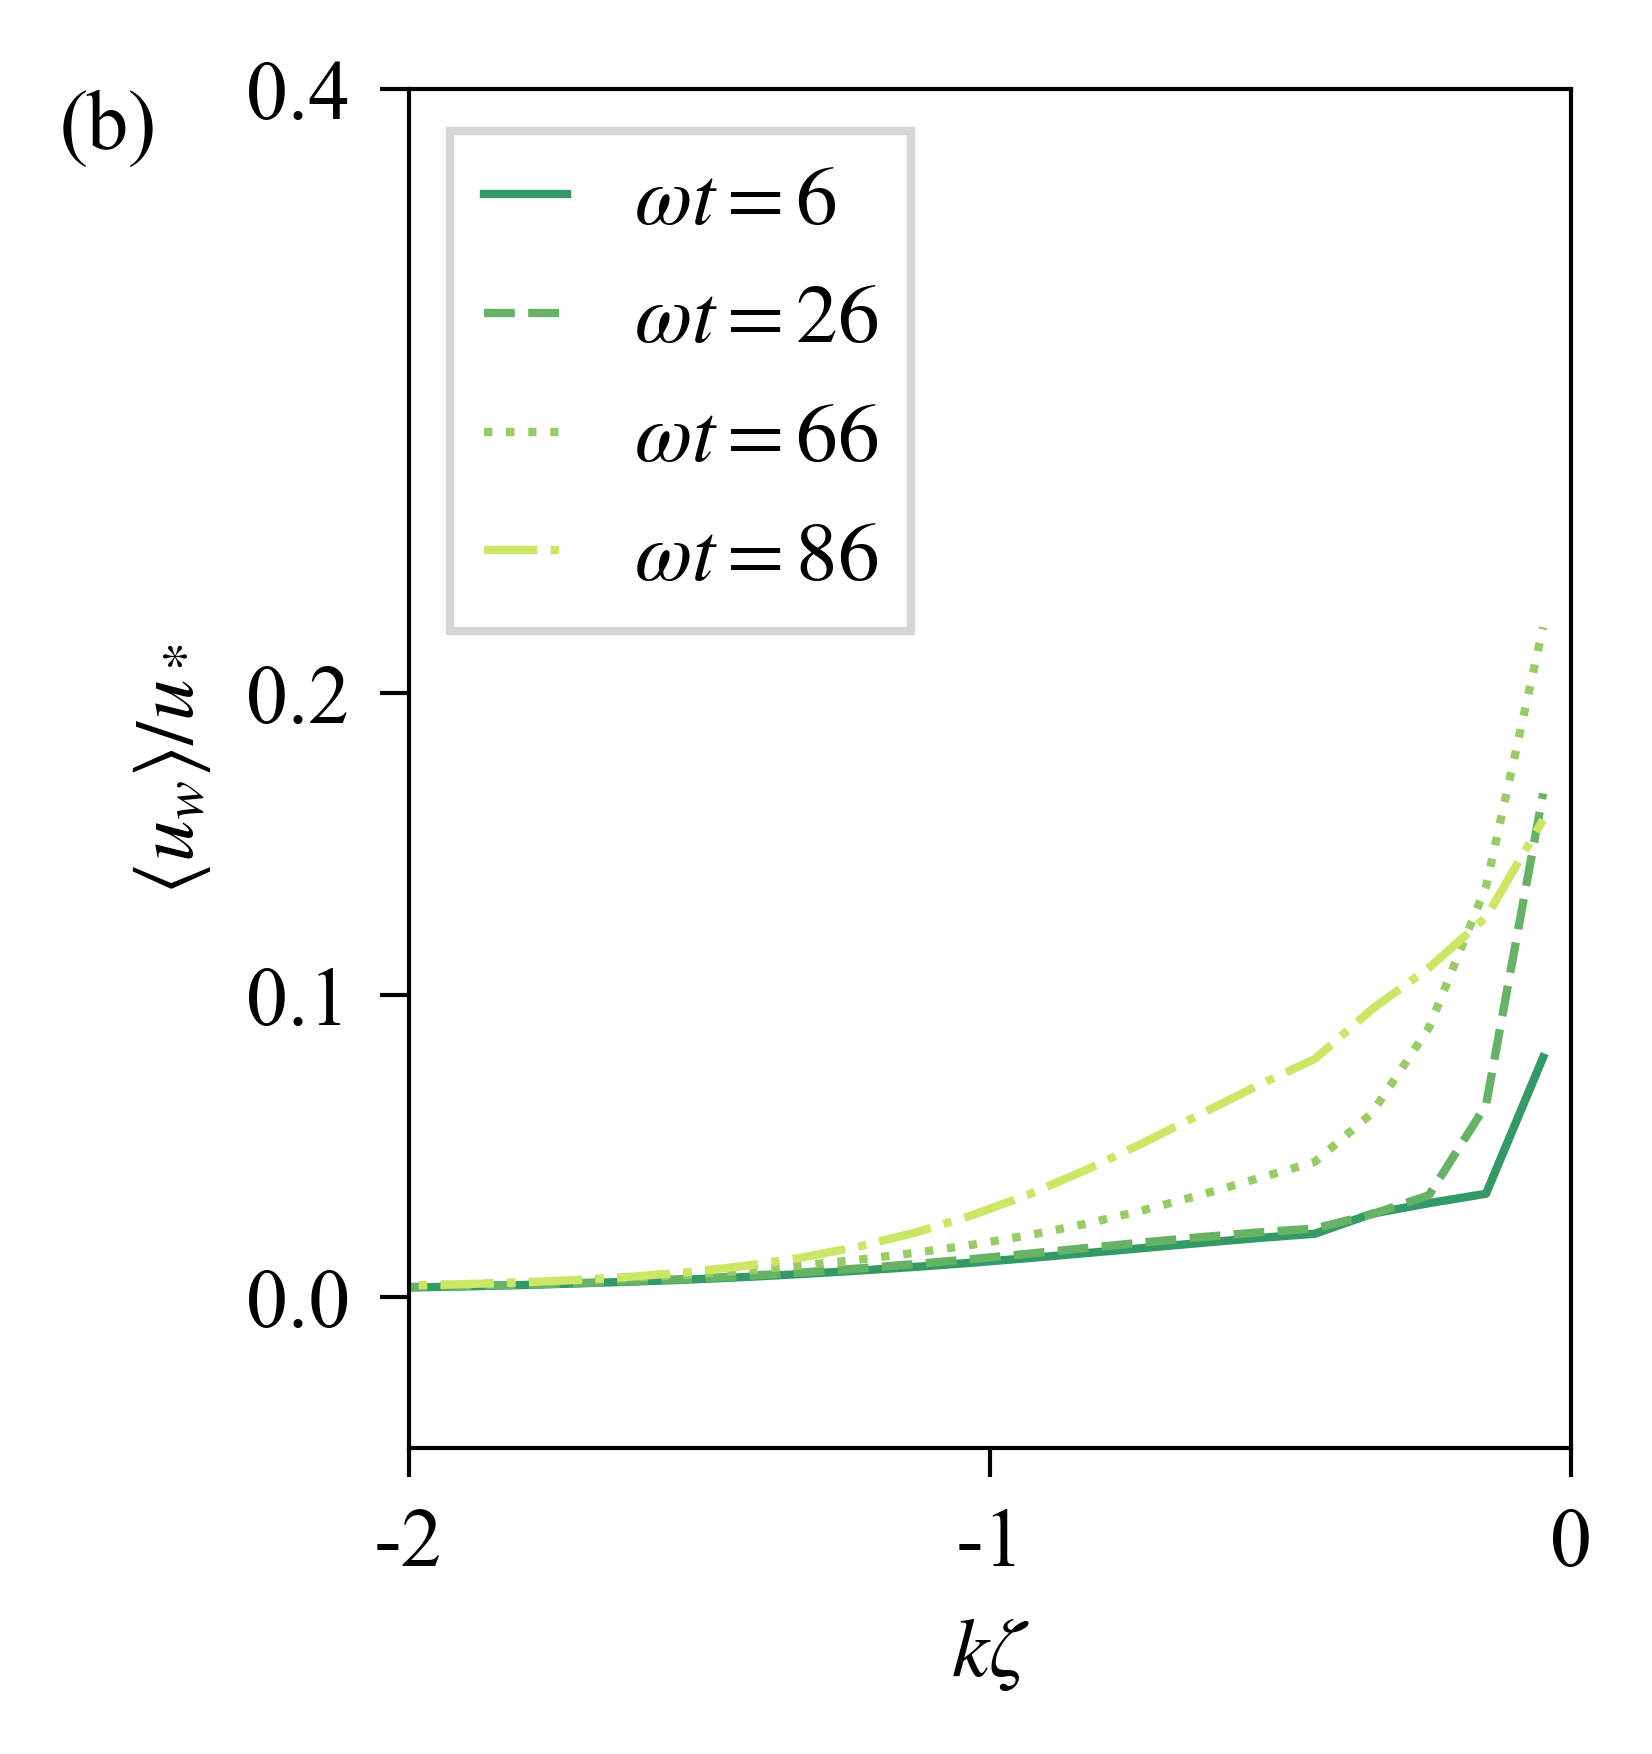

In [18]:
from cycler import cycler
from prepare import butter_lowpass_filter
plt.rc('axes', prop_cycle=(cycler('color', list('rbgk')) +
                           cycler('linestyle', ['-', '--', ':', '-.'])))

def plot1 (case, ax):
    field_t = case.field_t_select
    for i in range(0,4):
        t = (field_t[i] - case.tstart)*(case.g*case.k)**0.5
        ux_2D = np.average(case.ux_3D_ensem[i][:,:,:]*case.f_3D_ensem[i][:,:,:]**4/case.ustar, axis=0)
        eta_1D = np.average(case.eta_ensem[i], axis=0) - np.average(case.eta_ensem[i]) 
        u_water, u_water_interp, u_water_1D, zeta, zplot = water_profile_new (ux_2D, eta_1D)
        u_original = np.average(u_water_interp, axis=0)
        u_filter = np.copy(u_original)
        u_filter[0:74] = butter_lowpass_filter(u_original[0:74], CUT=4, N=512)
        ax.plot(zeta[:82:2]*4, u_filter[:82:2], c=plt.cm.get_cmap('summer')((i+1)/5), 
                 label=r'$\omega t = %.0f$' %t, lw=1)
    #     plt.plot(u_original[:82:2], zeta[:82:2]*4, c=plt.cm.get_cmap('Greens')(1-i/5), alpha=0.5)
    ax.set_xlim([-2,0])
    ax.set_xticks([0,-1,-2])
    ax.set_ylim([-0.05,0.4])
    ax.set_yticks([0,0.1,0.2,0.4])
    ax.set_ylabel(r'$\langle u_w \rangle/u_*$')
    ax.set_xlabel(r'$k\zeta$')
    ax.legend(loc='upper left', fancybox=False, handlelength=1)
    ax.text(-0.3, 1, '(b)', ha='left', va='top', transform=ax.transAxes) 

fig = plt.figure(figsize=[2.5,3]); ax = plt.gca()
case = case1
plot1 (case, ax)
# fig.savefig('./review/mean_uwater_CU%.0f.pdf' %(case.wave.c/case.ustar), bbox_inches='tight', pad_inches=0)

### Air mean profile

In [6]:
def air_profile_new(u_air, eta):
    """ uwater: a 2D array of water velocity 
        eta: a 1D array of surface """
    u_air_interp = np.zeros(u_air.shape)
    zplot = np.zeros(u_air.shape) # To show in the original cartesian grid z where the interpolating grid z' is
    for i in range(u_air.shape[0]): # For each x
        z = np.linspace(-1,2*np.pi-1,512,endpoint=False) + 2*np.pi/2/512
        f = interp1d(z, u_air[i,:], kind='quadratic')
        # The ratio to make sure that the cartesian representation of z' falls within the domain
        zeta = np.linspace(-1,2*np.pi-1,512,endpoint=False) + 2*np.pi/2/512
        zgrid = zeta + eta[i]*np.exp(-4*np.abs(zeta))
        zplot[i] = zgrid
        ugrid = f(zgrid[10:-10]) # Don't have to fill it all
        u_air_interp[i,10:-10] = ugrid
    u_air_1D = np.average(u_air_interp[:,:], axis=0)
    return u_air, u_air_interp, u_air_1D, zeta, zplot

In [7]:
case_pre2 = Case(ustar=0.25, Retau=720, Bo=None, g=None, ak=0.2, LEVEL=10, emax=0.3, OUTLEVEL=9, PRECURSOR=True,
                 working_dir='/projects/DEIKE/jiarongw/turbulence/', prefix='curved_fixREtau_precursor_')
case_pre2.tstart = 53
case_pre2_new = Case(ustar=0.25, Retau=720, Bo=None, g=None, ak=0.2, LEVEL=10, emax=0.3, OUTLEVEL=9, PRECURSOR=True,
                 working_dir='/projects/DEIKE/jiarongw/turbulence/rerun/', prefix='curved_fixREtau_precursor_')
case_pre2_new.tstart = 33

case = case_pre2
case.tsimu = np.arange(53,64,1)
extract_phase(case, case.tsimu, PRE=True)

case = case_pre2_new
case.tsimu = np.arange(33,38.5,0.1)
extract_phase(case, case.tsimu, PRE=True)

case = case_pre2
case.field_t_select = np.arange(53,58,1)
case.eta_ensem, case.ux_3D_ensem, case.uy_3D_ensem, case.f_3D_ensem = read_fields(case, case.field_t_select)
case.eta_1D_select = [np.average(eta, axis=0) for eta in case.eta_ensem] # eta is already aligned
case.ux_2D_select = [np.average(ux_3D, axis=0) for ux_3D in case.ux_3D_ensem]
case.uy_2D_select = [np.average(uy_3D, axis=0) for uy_3D in case.uy_3D_ensem]
case.f_2D_select = [np.average(f_3D, axis=0) for f_3D in case.f_3D_ensem]

pickle restored!
pickle restored!


0it [00:00, ?it/s]

53
pickle restored!
pickle restored!
pickle restored!


1it [00:01,  1.81s/it]

54
pickle restored!
pickle restored!
pickle restored!


2it [00:03,  1.78s/it]

55
pickle restored!
pickle restored!
pickle restored!


3it [00:05,  1.76s/it]

56
pickle restored!
pickle restored!
pickle restored!


4it [00:06,  1.73s/it]

57
pickle restored!
pickle restored!
pickle restored!


5it [00:08,  1.75s/it]


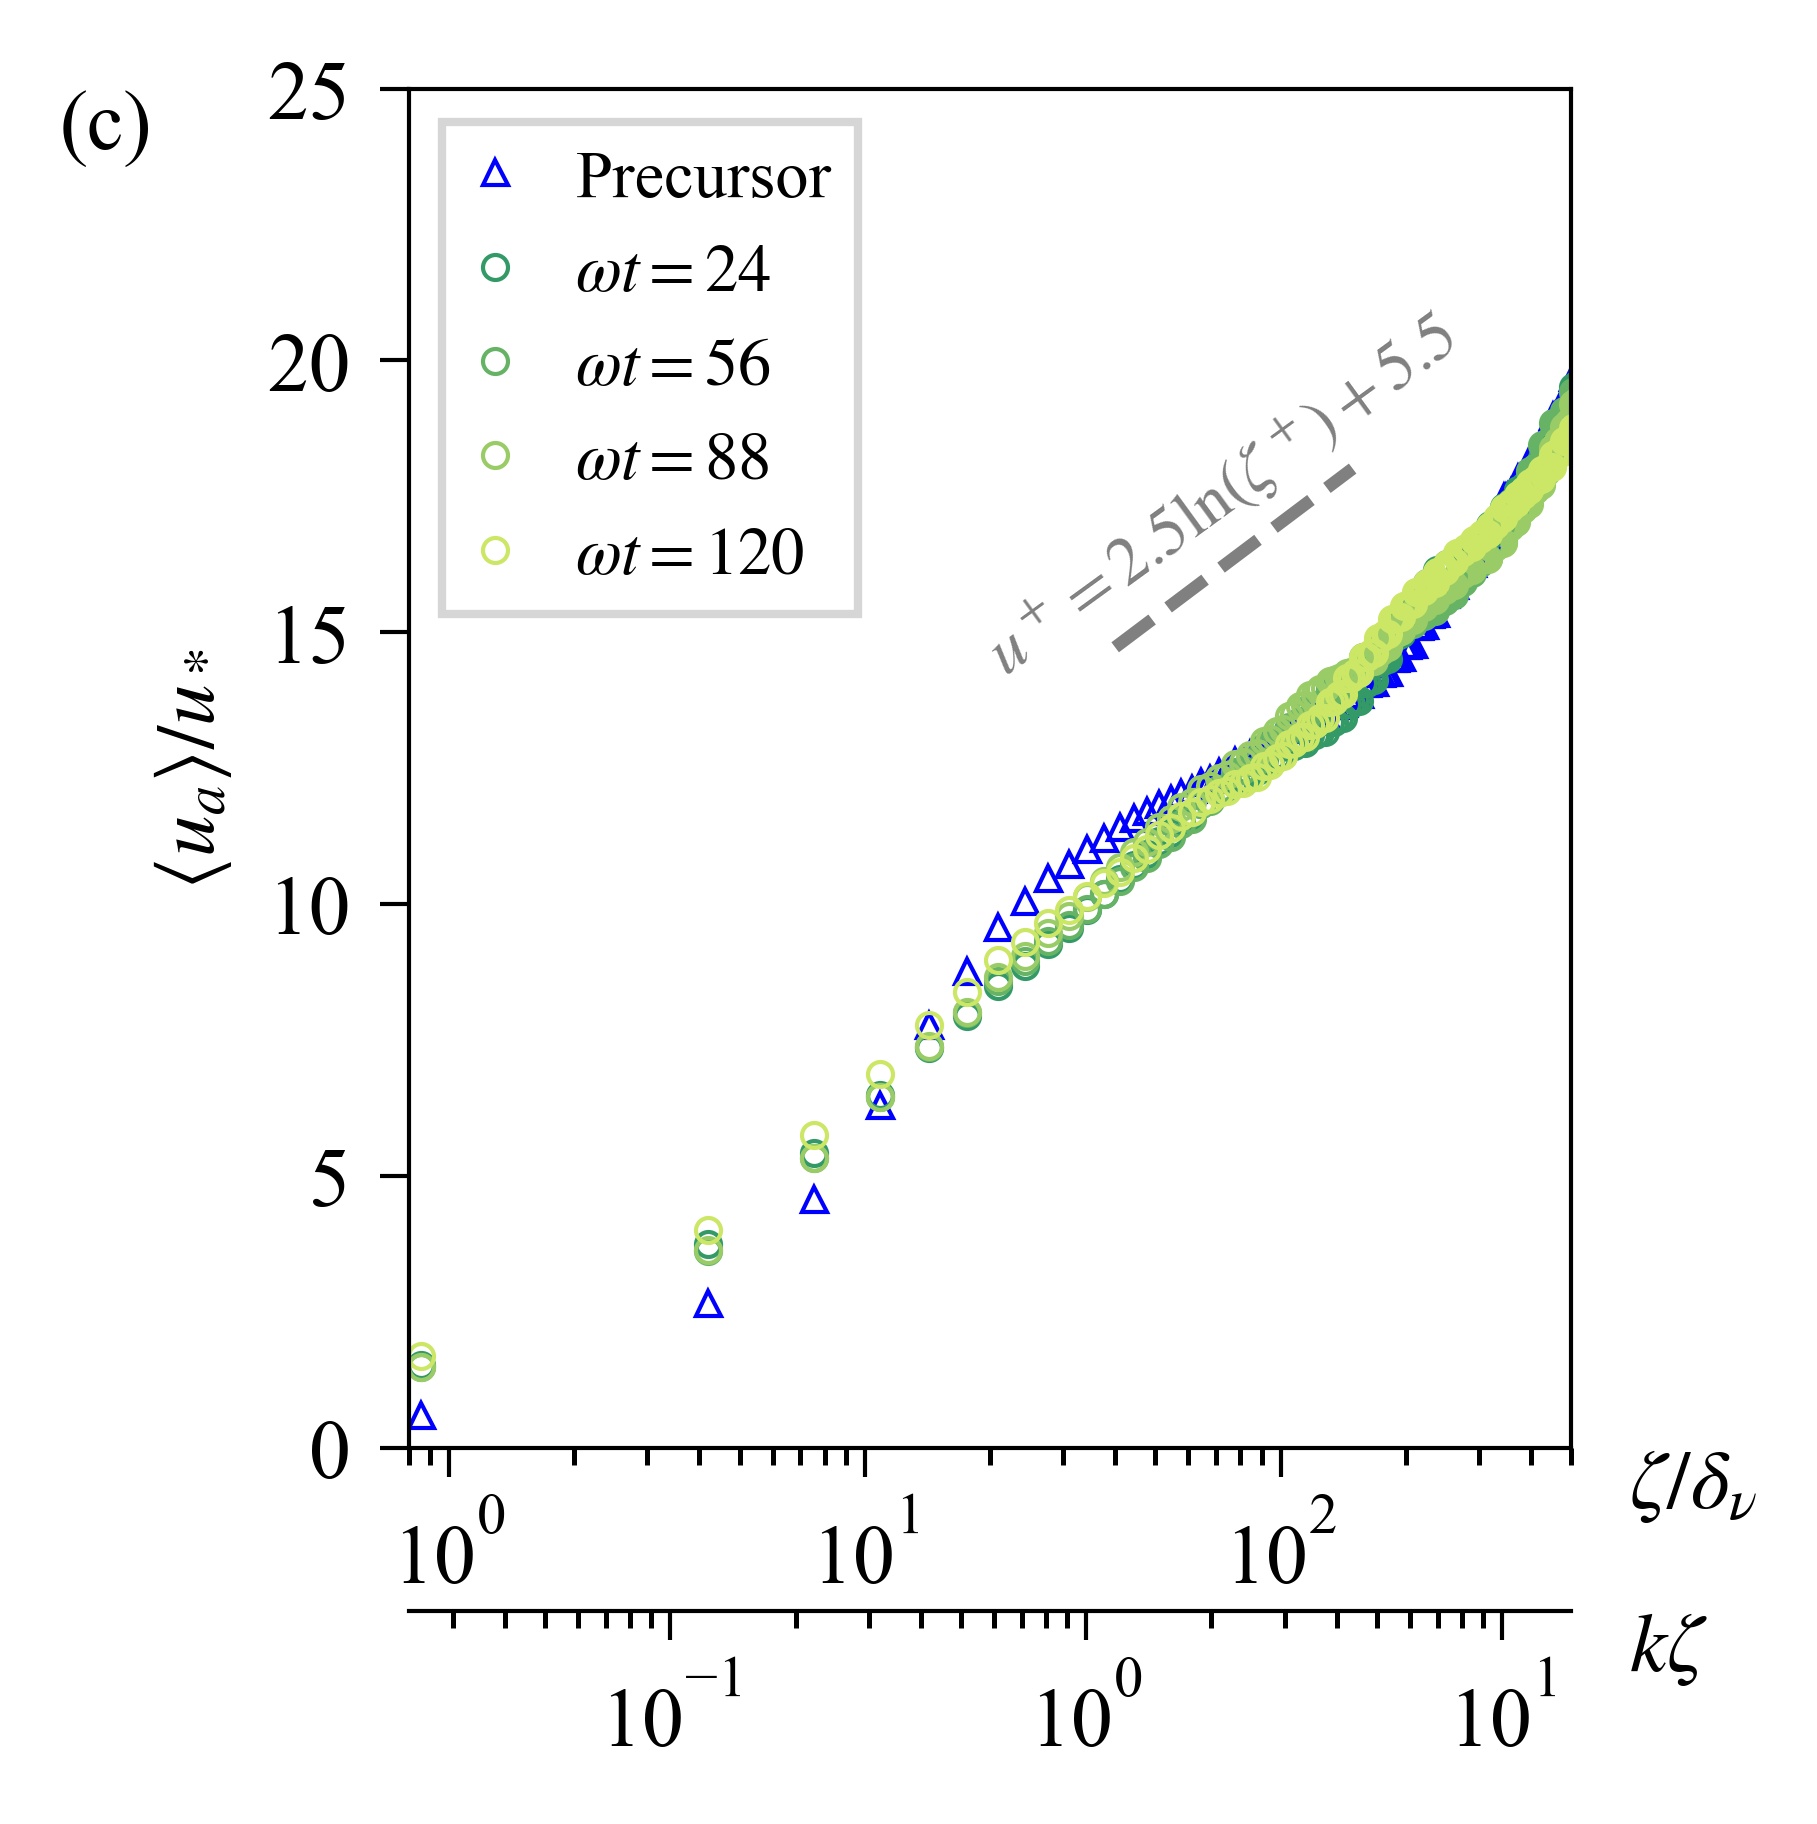

In [22]:
""" Mean profile: comparing stationary and travelling waves """

def draw(case, uxmean, ax, color='C0', marker='o', label='Precursor'):
    case.ytau = (2*np.pi-case.h)/case.Retau
    case.yarray = np.linspace(0,case.L0,case.N,endpoint=False)+case.L0/2**case.N/2 # Centered grid for interpolation
    ax.plot((case.yarray[70:-1:2]-case.h)/case.ytau, uxmean[70:-1:2]/case.ustar, c=color,
             marker=marker, mfc='none', markeredgewidth=0.5, markersize=3, linewidth=0, label=label) 

def plot2 (case, case_pre, ax):
    """ A second x axis """
    case.ytau = (2*np.pi-case.h)/case.Retau
    case_pre.ytau = (2*np.pi-case_pre.h)/case_pre.Retau
    
    def forward(x):
        global case
        return x*case.ytau*case.k
    def back(x):
        global case
        return x/case.k/case.ytau
    secax_x2 = ax.secondary_xaxis(-0.12, functions=(forward, back))

    """ Precursor """
    eta_1D = np.average(case_pre.eta_ensem[0], axis=0) - np.average(case_pre.eta_ensem[0]) 
    u_air_1D_pre = []
    for i in range(0,4):
        ux_2D = case_pre.ux_2D_select[i]*(1-case_pre.f_2D_select[i])**4
        u_air, u_air_interp, u_air_1D, zeta, zplot = air_profile_new (ux_2D, eta_1D)
        u_air_1D_pre.append(u_air_1D)
    u_air_1D = np.average(np.array(u_air_1D_pre), axis=0)
    draw(case_pre, u_air_1D, ax, marker='^', color='blue')
    
    """ Moving waves """
    for i in range(0,4):
        """ Without coordinate transformation """
    #     uxmean = np.average(case.ux_2D_select[i], axis=0)
    #     draw(case, uxmean, label=r'$\omega t = %.0f$' % (case.field_t_select[i]*case.wave.omega),color=plt.cm.get_cmap('summer')(1-i/30))
    #     ax.annotate(r'$zk$', xy=(1.05, -0.12), ha='left', va='top', xycoords='axes fraction')
    #     ax.annotate(r'$z/\delta_{\nu}$', xy=(1.05, 0), ha='left', va='top', xycoords='axes fraction')

        """ With coordinate transformation """
        t = case.field_t_select[i] 
        eta_1D = np.average(case.eta_ensem[i], axis=0) - np.average(case.eta_ensem[i]) 
        ux_2D = case.ux_2D_select[i]*(1-case.f_2D_select[i])**4
        u_air, u_air_interp, u_air_1D, zeta, zplot = air_profile_new (ux_2D, eta_1D)
        draw(case, u_air_1D, ax, label=r'$\omega t = %.0f$' % ((case.field_t_select[i]-case.tstart)*case.wave.omega),color=plt.cm.get_cmap('summer')((i+1)/5))
    ax.annotate(r'$k\zeta $', xy=(1.05, -0.12), ha='left', va='top', xycoords='axes fraction')
    ax.annotate(r'$\zeta /\delta_{\nu}$', xy=(1.05, 0), ha='left', va='top', xycoords='axes fraction')

    y = np.arange(40,150)
    ax.plot(y, 1/0.4*np.log(y)+5.5, '--', color='gray')
    ax.text(0.7, 0.7, r'$u^+=2.5\ln(\zeta^+)+5.5$', ha='center', va='center', rotation=36, fontsize=8,
            color='gray', transform=ax.transAxes)
    ax.set_xscale('log')
    ax.set_ylim([0, 25])
    ax.set_xlim([0.8, 500])
    ax.set_ylabel(r'$\langle u_a \rangle/u_*$') 
    ax.text(-0.3, 1, '(c)', ha='left', va='top', transform=ax.transAxes) 
    ax.legend(fancybox=False, handlelength=0.8, fontsize=8)
    
    
fig = plt.figure(figsize=[2.5,3]); ax = plt.gca()
plot2 (case3, case_pre2, ax)
# fig.savefig('./review/mean_uair_CU%.0f.pdf' %(case.wave.c/case.ustar), bbox_inches='tight', pad_inches=0)

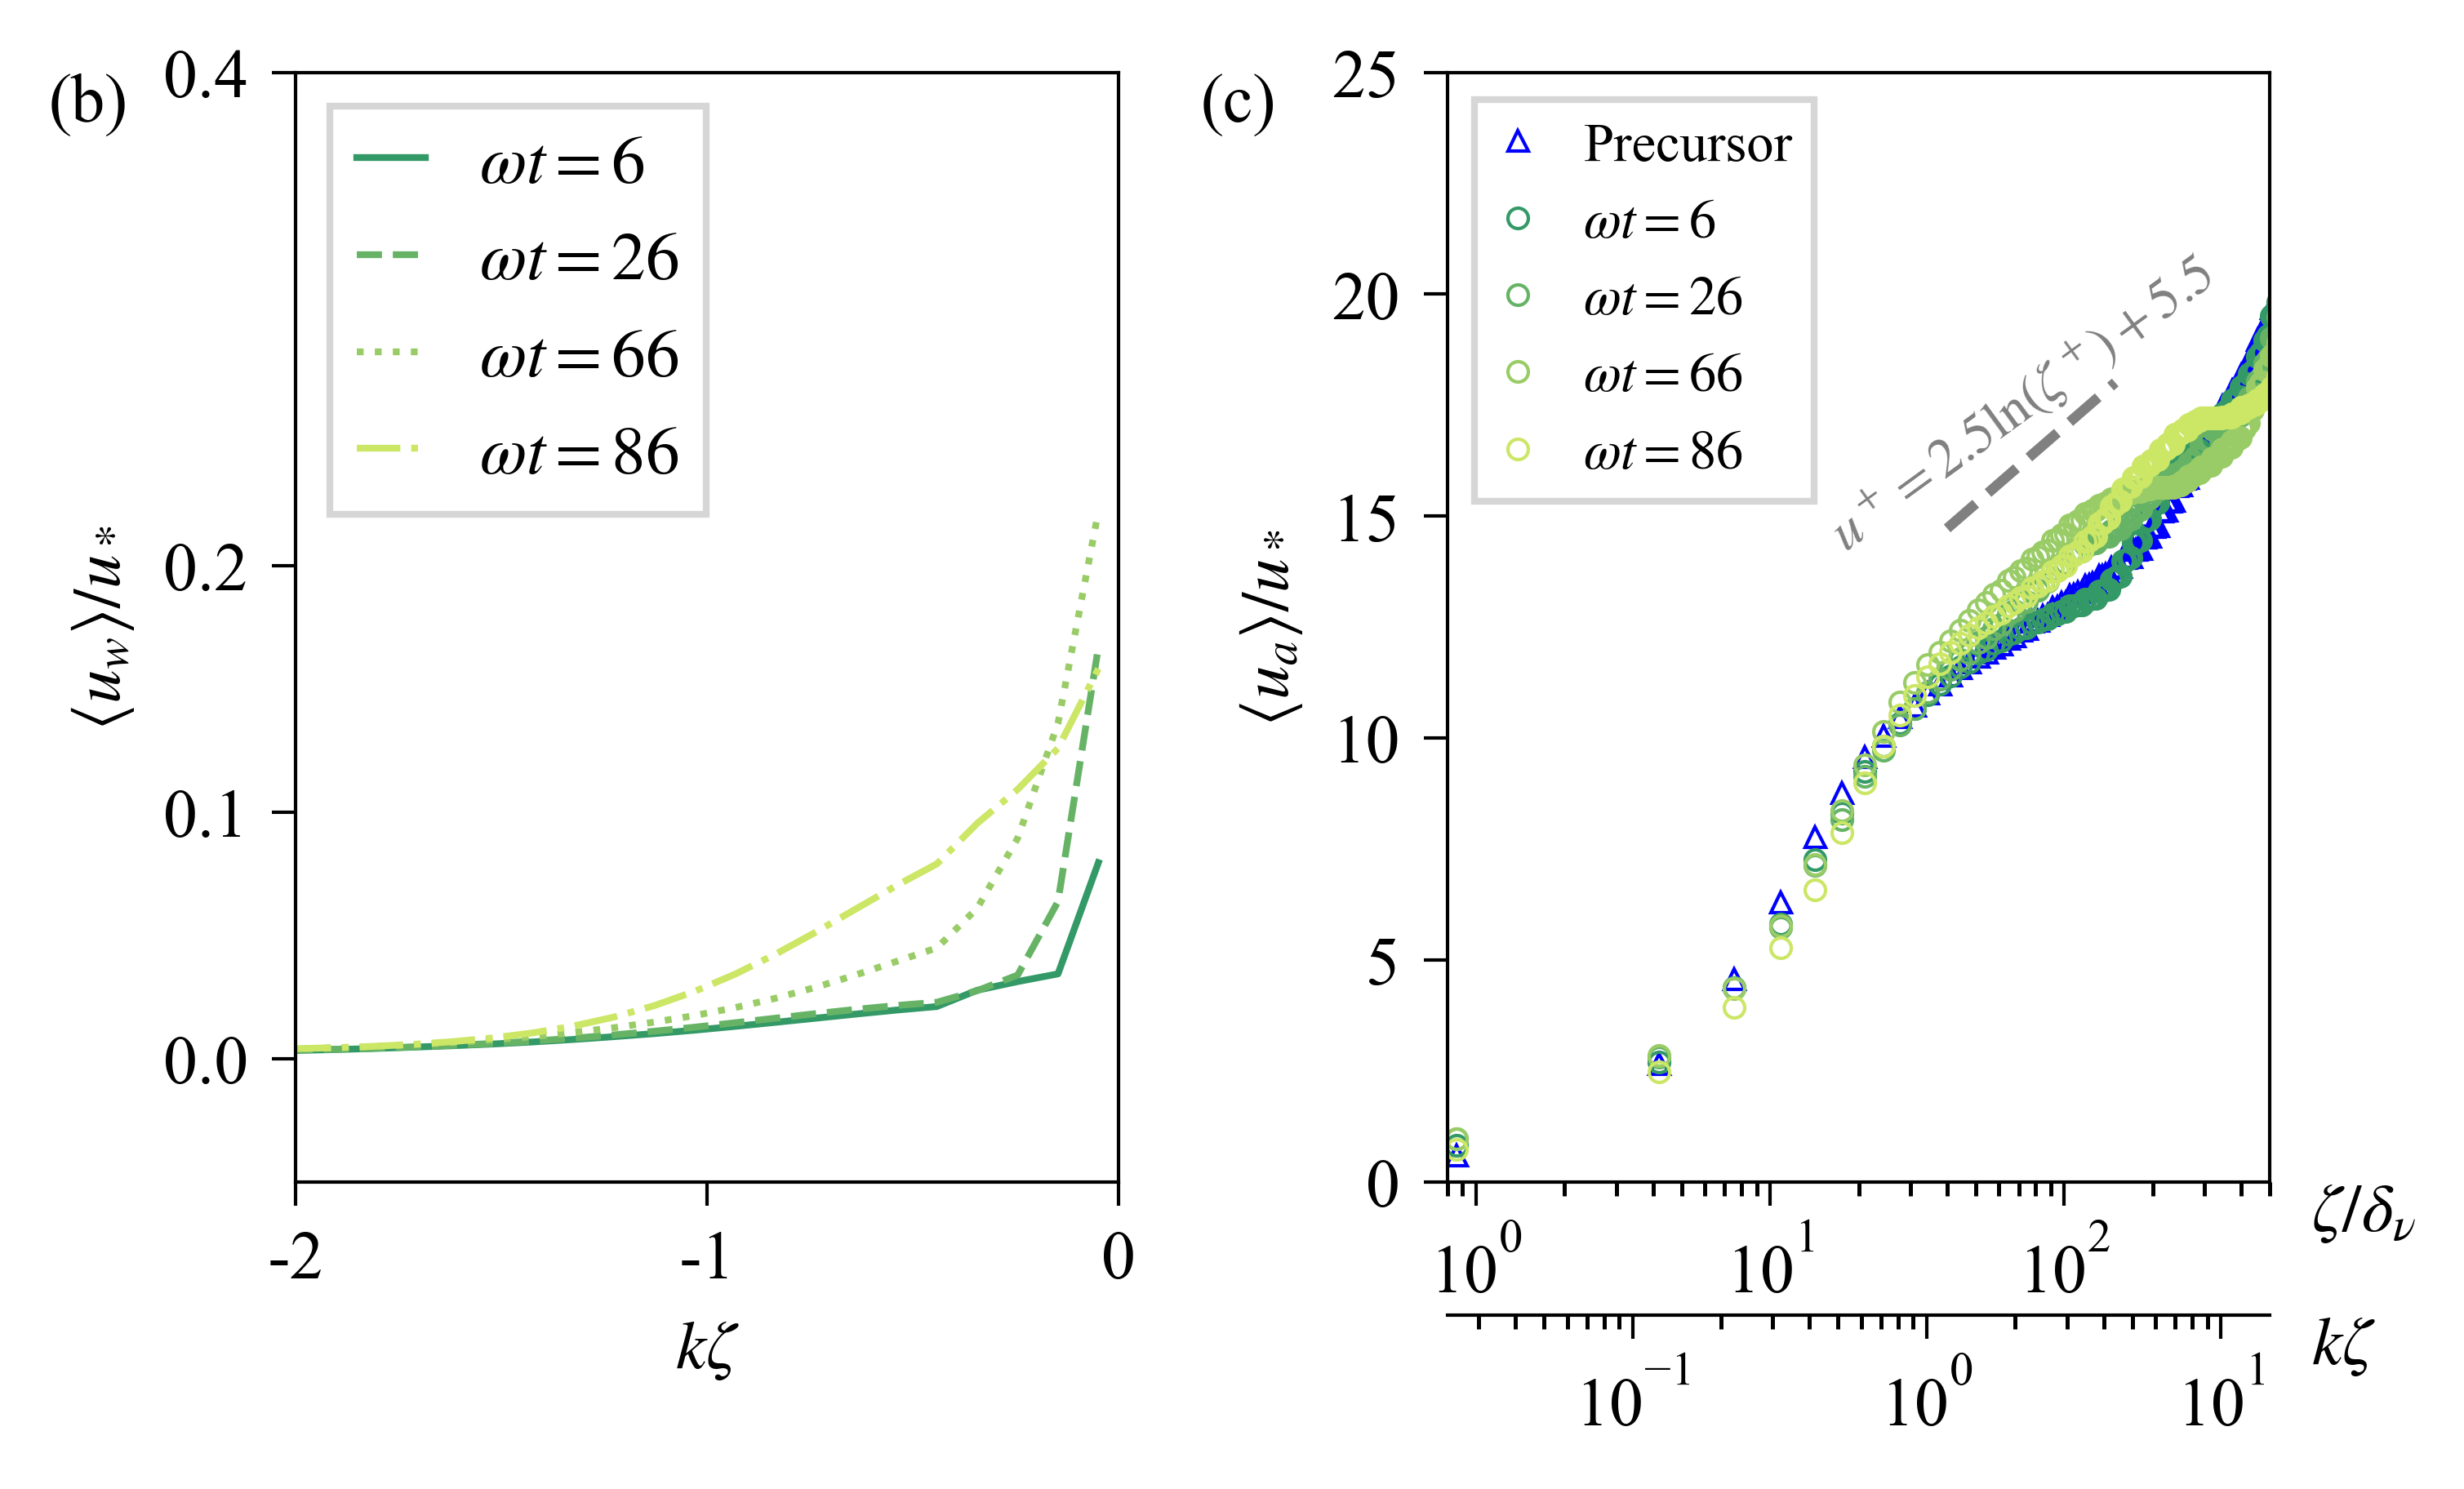

In [25]:
""" Put subfigure (b) and (c) together """
fig, axes = plt.subplots(1, 2, figsize=[5.2,3], gridspec_kw={'width_ratios':[1,1], "wspace":0.4})
case = case1
plot1 (case, axes[0])
plot2 (case, case_pre2, axes[1])
fig.savefig('./review/mean_uair_uwater_CU%.0f.pdf' %(case.wave.c/case.ustar), bbox_inches='tight', pad_inches=0)

### Wave shape

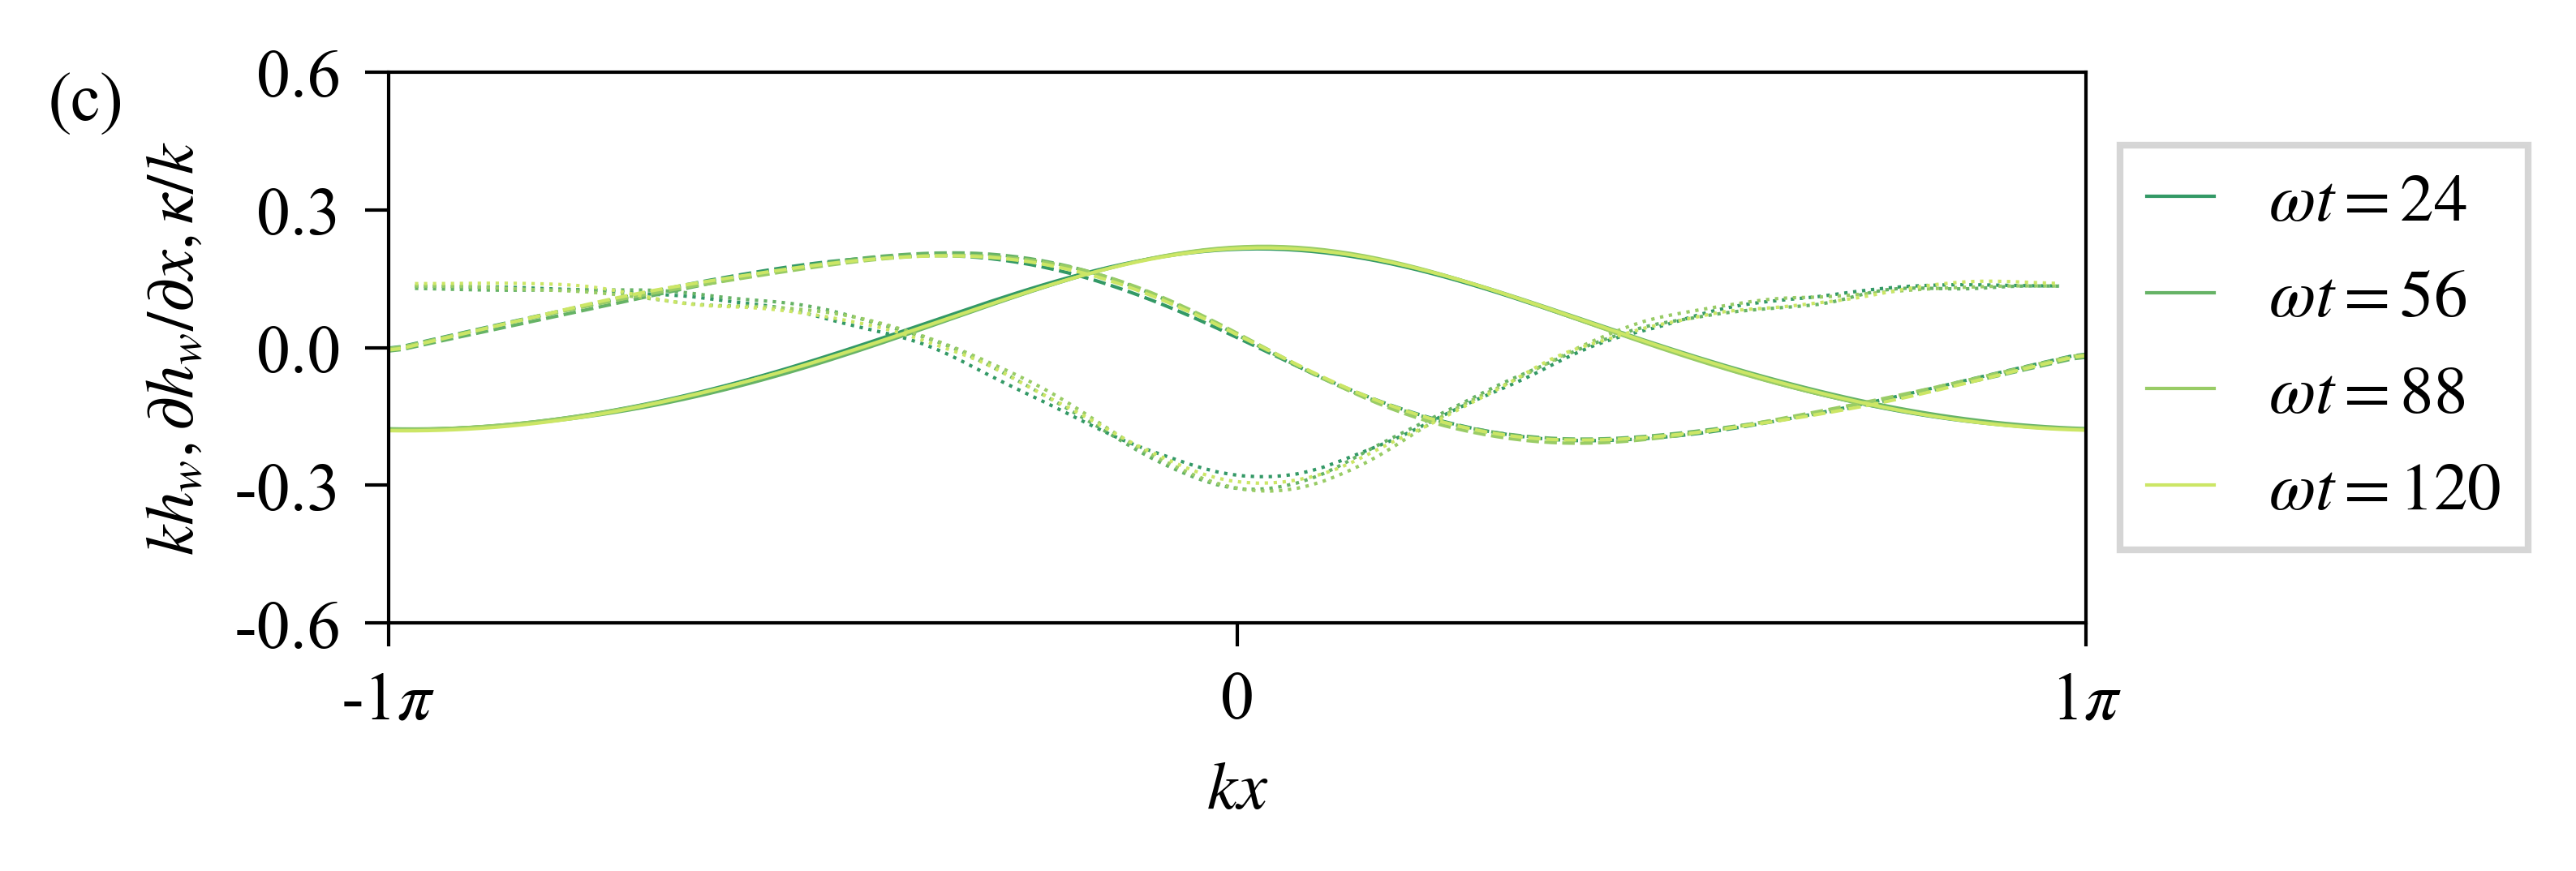

In [138]:
""" Wave shape:
    For the ak=0.2 case, pick t = np.array([60, 70, 90, 100]) """
import pandas as pd
from matplotlib.ticker import FuncFormatter, MultipleLocator
from prepare import butter_lowpass_filter

fig = plt.figure(figsize=[4.5,1.5]); ax = plt.gca()

case = case3
x = np.linspace(-np.pi/4,np.pi/4,128)
for i in range(0,4):
    eta_1D = np.average(case.eta_ensem[i], axis=0) - np.average(case.eta_ensem[i]) 
    eta_1D_filter = butter_lowpass_filter(eta_1D, CUT=4)
    t = (case.field_t_select[i]-case.tstart)*case.wave.omega
    plt.plot(x*case.k, eta_1D_filter[63:63+128]*4, '-', c=plt.get_cmap('summer')((i+1)/5), lw=0.5, label=r'$\omega t = %.0f$' %t)
    grad = np.gradient(eta_1D_filter[63:63+128],x)
    grad_filter = butter_lowpass_filter(grad, CUT=4)
    curv1 = np.gradient(grad_filter,x)/(1+grad_filter**2)**(1.5)
    curv2 = np.gradient(grad,x)/(1+grad**2)**(1.5)
    plt.plot(x*case.k, grad, '--', c=plt.get_cmap('summer')((i+1)/5), lw=0.5)
#     plt.plot(x, grad_filter, '--', c=plt.get_cmap('summer')(i/5), lw=0.5)
#     plt.plot(x, curv1, ':', c=plt.get_cmap('summer')(i/5), lw=0.5)
    plt.plot(x[2:-2]*case.k, curv2[2:-2]/case.k, ':', c=plt.get_cmap('summer')((i+1)/5), lw=0.5)

    
# waveshape = pd.read_csv('otherdata/Zdyrski2020_waveshape1.csv', names=['x','khw'], delimiter=',')
# plt.plot(waveshape['x'], waveshape['khw'], lw=0.5, c='k')
# waveshape = pd.read_csv('otherdata/Zdyrski2020_waveshape2.csv', names=['x','khw'], delimiter=',')
# plt.plot(waveshape['x'], waveshape['khw'], lw=0.5, c='k')

plt.ylim([-0.6,0.6])
plt.xlim([-np.pi,np.pi])
ax.xaxis.set_major_formatter(FuncFormatter(
   lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'
))
ax.set_yticks([-0.6,-0.3,0,0.3,0.6])
ax.set_xticks([-np.pi,0,np.pi])
plt.legend(fancybox=False, loc='center left', bbox_to_anchor=(1, 0.5), handlelength=1)
plt.xlabel(r'$kx$')
plt.ylabel(r'$kh_w, \partial h_w/\partial x, \kappa/k$')
ax.text(-0.2, 1, '(c)', ha='left', va='top', transform=ax.transAxes) 
fig.savefig('./review/waveshape_CU%.0f.pdf' %(case.wave.c/case.ustar), bbox_inches='tight', pad_inches=0)

In [ ]:
""" Visulization of uy """

fig = plt.figure(figsize=[2,1.5])
ax = plt.gca()
# case.eta_shift.append(np.roll(case.eta[0], -case.shift_index[0]))
# case.uy_shift.append(np.roll(case.uy[0], -case.shift_index[0], axis=0))
# case.f_shift.append(np.roll(case.f[0], -case.shift_index[0], axis=0))
# img = plt.imshow(np.rot90(case.uy_shift[0]*(1-case.f_shift[0])/0.25), cmap='RdBu', extent=[-np.pi,np.pi,0,2*np.pi],
#                  vmax = 1.2, vmin = -1.2)
img = plt.imshow(np.rot90(case.uy_center[0]*(1-case.f_center[0])/0.25), cmap='RdBu', extent=[-np.pi,np.pi,0,2*np.pi],
                 vmax = 2, vmin = -2)
NGRID = 512; NSLICE = 256; L0 = 2*np.pi
xarray = np.linspace(-L0/2.,L0/2.,NGRID,endpoint=False)+L0/2**NGRID/2
plt.plot(xarray, case.eta_shift[0], c='k', lw=0.8)
cbar = fig.colorbar(img, orientation="vertical", pad=0.01)
plt.axis('off')
cbar.ax.text(0.5, 1.05, r'$\overline{v}/u_{*}$', ha='center', va='center', 
             transform=cbar.ax.transAxes)
# fig.savefig('/home/jiarong/Downloads/ICTAM/uy_g1.pdf')

In [ ]:
""" Put the x-y and x-z plane together OBSOLETE """

fig = plt.figure (figsize = [2,1.5])

# plt.imshow(np.rot90(case.ux[0][:,0:128]*(case.f[0][:,0:128]**2)/case.wave.c), cmap='RdBu', 
#            vmax = 0.4, vmin = -0.4, extent=[-np.pi,np.pi,0,0.5*np.pi])
part1 = case.ux_center[0][1:-1:2,0:256]*(case.f_center[0][1:-1:2,0:256]**2)
part2 = case.ux_yzcrest[0][:,0:128]*(case.f_yzcrest[0][:,0:128]**2)
part3 = case.ux_yztrough[0][:,0:128]*(case.f_yztrough[0][:,0:128]**2)
img = np.concatenate((part3, part2, part1), axis=1)
plt.imshow(np.rot90(img)/case.wave.c, cmap='RdBu', 
           vmax = 0.4, vmin = -0.4, extent=[-np.pi,np.pi,0,2*np.pi])

# plt.plot(xarray, case.eta[0], c='k', lw=1)
ax = plt.gca(); ax.text(1.1,1.1, r'$u_w/c$', ha='center', va='center', transform=ax.transAxes)
plt.colorbar(); ax.axis('off')

In [ ]:
""" Demonstrating the coordinate transform """
i = 0
ux_2D = np.average(case.ux_3D_ensem[i][:,:,:]*case.f_3D_ensem[i][:,:,:]**4/case.ustar, axis=0)
eta_1D = np.average(case.eta_ensem[i], axis=0) - np.average(case.eta_ensem[i]) 
u_water, u_water_interp, u_water_1D, zeta, zplot = water_profile_new (ux_2D, eta_1D)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.imshow(np.rot90(u_water), extent=[-np.pi,np.pi,-1,2*np.pi-1], vmax=1, vmin=-1, cmap='RdBu')
x = np.linspace(-np.pi, np.pi, 512)
for i in range(0,200,20):
    ax1.plot(x, zplot[:,i], lw=0.5, c='k')
ax2.imshow(np.rot90(u_water_interp), extent=[-np.pi,np.pi,-1,2*np.pi-1], vmax=1, vmin=-1, cmap='RdBu')
for i in range(0,200,20):
    ax2.plot(x, zeta[i]*x/x, lw=0.5, c='k')

In [ ]:
fig = plt.figure(figsize=[2.5,2]); ax = plt.gca()
y = np.linspace(-1, 2*np.pi-1, 512)*4
for i in range(0,4):
    t = (field_t[i] - case.tstart)*(case.g*case.k)**0.5
    ux_2D = np.average(case.ux_3D_ensem[i][:,:,:]*case.f_3D_ensem[i][:,:,:]**4/case.ustar, axis=0)
    plt.plot(np.average(ux_2D, axis=0), y, c=plt.cm.get_cmap('Greens')(1-i/5), 
             label=r'$\omega t = %.0f$' %t, lw=1)
plt.ylim([-2,0])
ax.set_yticks([0,-1,-2])
plt.xlim([-0.05,0.25])
plt.xlabel(r'$\langle u \rangle/u_*$')
plt.ylabel(r'$kz$')
plt.legend(loc='lower right', fancybox=False)
# fig.savefig('./review/mean_uwater.pdf')

In [ ]:
time = [10,11,12,13]
fig = plt.figure(figsize=(10,2))
grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
                 nrows_ncols=(1,4),
                 axes_pad=0.05,
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="3%",
                 cbar_pad=0.05,
                 )
for i in range(0,4):
    pcontour = grid[i].imshow(np.rot90(case.uy_center[i]*(1-case.f_center[i])/0.25), cmap='RdBu', 
                          extent=[-np.pi,np.pi,0,2*np.pi],
                          vmax = 4, vmin = -4)
    NGRID = 512; NSLICE = 256; L0 = 2*np.pi
    xarray = np.linspace(-L0/2.,L0/2.,NGRID,endpoint=False)+L0/2**NGRID/2
    grid[i].plot(xarray, case.eta[i], c='k', lw=1)
    grid[i].axis('off') 
    grid[i].set_title(r"$t = %.1f T$" %((time[i]-57)/(2*np.pi/case.wave.omega)), fontsize=14)
cbar = grid.cbar_axes[0].colorbar(pcontour)
cbar.ax.text(7, 0, r'$v_a/u_{*}$', rotation = 90, ha='center', va='center', fontsize=14)     

# fig.savefig('/home/jiarong/Downloads/ICTAM/panel_vair.pdf')

# img = plt.imshow(np.rot90(case.uy_center[0]*(1-case.f_center[0])/0.25), cmap='RdBu', extent=[-np.pi,np.pi,0,2*np.pi],
#                  vmax = 2, vmin = -2)
# NGRID = 512; NSLICE = 256; L0 = 2*np.pi
# xarray = np.linspace(-L0/2.,L0/2.,NGRID,endpoint=False)+L0/2**NGRID/2
# plt.plot(xarray, case.eta_shift[0], c='k', lw=0.8)
# cbar = fig.colorbar(img, orientation="vertical", pad=0.01)
# plt.axis('off')
# cbar.ax.text(0.5, 1.05, r'$\overline{v}/u_{*}$', ha='center', va='center', 
#              transform=cbar.ax.transAxes)